In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import randint

In [2]:
val = pd.read_csv('D:/multi/validation.csv')
val.head(5)

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,79,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111"
1,0,1,21,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,a23f0cfab6592c137f796e68fa752fceba08bb1b,windows_chrome,58.247.250.*,79,79,1.0,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110"
2,0,4,8,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,5105a013ea54a9706146033e6a138d5234a3803e,windows_ie,117.12.111.*,2,2,2.0,...,250,2,0,5,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111"
3,0,5,15,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,577e9a768ce17e73c61ba7022db927f9ee761830,windows_chrome,61.187.224.*,201,205,2.0,...,280,2,0,5,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110"
4,0,1,18,0899bf144249458ea9c89188473694bf44c7ca15,e4bf79c562745d671b19f2edf7fda89c2e25987f,windows_chrome,117.41.145.*,134,135,2.0,...,200,1,0,5,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110"


In [3]:
# Q2.1 constant bidding
data = pd.DataFrame(columns=['bid','clicks','imps','spent','CTR','CPC','CPM'])
lists = {'bid':[], 'clicks':[], 'imps':[], 'spent':[], 'ctr':[], 'cpc':[], 'cpm':[]}
for bid in range(0, 302, 2):
    budget = 6250000
    imps = 0
    clicks = 0 
    spent = 0
    for payprice, clicked in val[['payprice','click']].values:
        if budget < payprice:
            break
        if bid >= payprice:
            imps += 1
            clicks += clicked
            budget = budget - payprice
            spent = spent + payprice
    ctr = ((clicks / imps) * 100).round(4).astype(str)
    cpm = ((spent / imps) * 1000).round(4).astype(str)
    cpc = (spent / clicks).round(4).astype(str)
    lists['bid'].append(bid)
    lists['clicks'].append(clicks)
    lists['imps'].append(imps)
    lists['spent'].append(spent)
    lists['ctr'].append(ctr)
    lists['cpc'].append(cpc)
    lists['cpm'].append(cpm)
    
data.bid = lists['bid']
data.clicks = lists['clicks']
data.imps = lists['imps']
data.spent = lists['spent']
data.CTR = lists['ctr']
data.CPC = lists['cpc']
data.CPM = lists['cpm']
data.head(5)


C:\Users\Yunfei Cai\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\Yunfei Cai\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in longlong_scalars


,bid,clicks,imps,spent,CTR,CPC,CPM
0,0,0,82,0,0.0,nan,0.0
1,2,0,851,1247,0.0,inf,1465.3349
2,4,0,2176,6455,0.0,inf,2966.4522
3,6,4,9624,45486,0.0416,11371.5,4726.3092
4,8,4,12373,65999,0.0323,16499.75,5334.1146


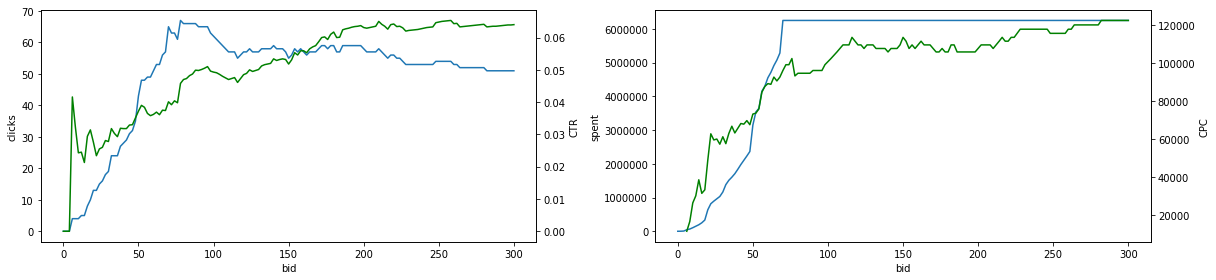

In [6]:
fig,(ax1,ax3)=plt.subplots(1,2,figsize=(17,4))

clicks = data[['clicks','bid']]
ctrs = data[['CTR','bid']]
ctrs = ctrs.astype(float)
clicks = clicks.astype(float)
ax1.plot(clicks['bid'],clicks['clicks'])
ax1.set_xlabel('bid',color='k')
ax1.set_ylabel('clicks')

ax2 = ax1.twinx()
ax2.plot(ctrs['bid'],ctrs['CTR'],color='g')
ax2.set_ylabel('CTR',color='k')
#fig.savefig('constant_bid.png')

clicks = data[['spent','bid']]
ctrs = data[['CPC','bid']]
ctrs = ctrs.astype(float)
clicks = clicks.astype(float)
ax3.plot(clicks['bid'],clicks['spent'])
ax3.set_xlabel('bid',color='k')
ax3.set_ylabel('spent')

ax4 = ax3.twinx()
ax4.plot(ctrs['bid'],ctrs['CPC'],color='g')
ax4.set_ylabel('CPC',color='k')
#
plt.tight_layout()
fig.savefig('constant_bid.png',dpi=300)

In [4]:
data.iloc[np.where(data.clicks == data.clicks.max())[0]]

,bid,clicks,imps,spent,CTR,CPC,CPM
39,78,67,146308,6249827,0.0458,93281.0,42716.9191


In [13]:
# Q2.2 Random bidding 
import random
data = pd.DataFrame(columns=['lower_bound','upper_bound','clicks','imps','spent','CTR','CPC','CPM'])
lists = {'lower_bound':[],'upper_bound':[], 'clicks':[], 'imps':[], 'spent':[], 'ctr':[], 'cpc':[], 'cpm':[]}

for j in range(0, 300, 5):
    for k in range(j, 305, 5):
        budget = 6250000
        imps = 0
        clicks = 0
        spent = 0
        for payprice,clicked in val[['payprice','click']].values:
            bid = random.randint(j, k)
            if budget < payprice:
                continue
            if bid >= payprice:
                imps += 1
                clicks += clicked
                budget = budget - payprice
                spent = spent + payprice
        ctr = ((clicks / imps) * 100).round(4).astype(str)
        cpm = ((spent / imps) * 1000).round(4).astype(str)
        cpc = (spent / clicks).round(4).astype(str)
        lists['upper_bound'].append(k)
        lists['lower_bound'].append(j)
        lists['clicks'].append(clicks)
        lists['imps'].append(imps)
        lists['spent'].append(spent)
        lists['ctr'].append(ctr)
        lists['cpc'].append(cpc)
        lists['cpm'].append(cpm)    

data.lower_bound = lists['lower_bound']
data.upper_bound = lists['upper_bound']
data.clicks = lists['clicks']
data.imps = lists['imps']
data.spent = lists['spent']
data.CTR = lists['ctr']
data.CPC = lists['cpc']
data.CPM = lists['cpm']
data.head(5)

C:\Users\Yunfei Cai\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\Yunfei Cai\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in longlong_scalars


,lower_bound,upper_bound,clicks,imps,spent,CTR,CPC,CPM
0,0,0,0,82,0,0.0,nan,0.0
1,0,5,0,2041,7338,0.0,inf,3595.2964
2,0,10,2,6893,36167,0.029,18083.5,5246.9172
3,0,15,2,11534,78058,0.0173,39029.0,6767.6435
4,0,20,5,16811,147450,0.0297,29490.0,8771.0428


In [17]:
print(data)

      lower_bound  upper_bound  clicks    imps    spent     CTR          CPC  \
0               0            0       0      82        0     0.0          nan   
1               0            5       0    2041     7338     0.0          inf   
2               0           10       2    6893    36167   0.029      18083.5   
3               0           15       2   11534    78058  0.0173      39029.0   
4               0           20       5   16811   147450  0.0297      29490.0   
5               0           25       7   24520   282539  0.0285   40362.7143   
6               0           30       8   30961   405388  0.0258      50673.5   
7               0           35      12   37383   549626  0.0321   45802.1667   
8               0           40      14   43158   691019  0.0324      49358.5   
9               0           45      14   48609   840111  0.0288   60007.9286   
10              0           50      19   53744   998785  0.0354   52567.6316   
11              0           55      13  

In [14]:
data.iloc[np.where(data.clicks == data.clicks.max())[0]]

,lower_bound,upper_bound,clicks,imps,spent,CTR,CPC,CPM
366,30,105,82,158636,6231342,0.0517,75991.9756,39280.7559


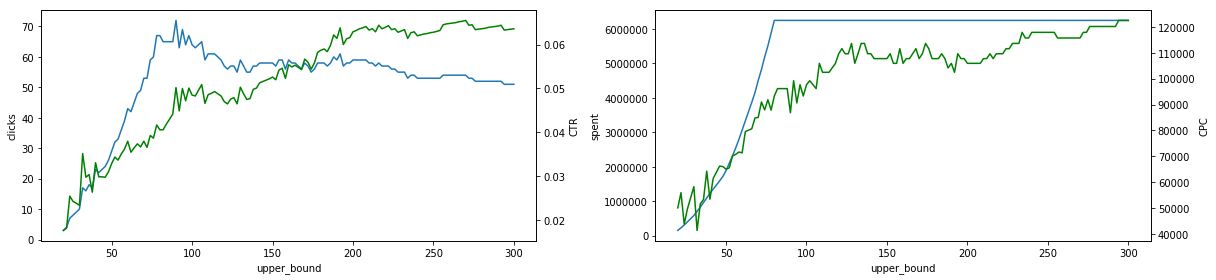

In [20]:

fig,(ax1,ax3)=plt.subplots(1,2,figsize=(17,4))

clicks = data[['clicks','upper_bound']]
ctrs = data[['CTR','upper_bound']]
ctrs = ctrs.astype(float)
clicks = clicks.astype(float)
ax1.plot(clicks['upper_bound'],clicks['clicks'])
ax1.set_xlabel('upper_bound',color='k')
ax1.set_ylabel('clicks')

ax2 = ax1.twinx()
ax2.plot(ctrs['upper_bound'],ctrs['CTR'],color='g')
ax2.set_ylabel('CTR',color='k')
#fig.savefig('constant_bid.png')

clicks = data[['spent','upper_bound']]
ctrs = data[['CPC','upper_bound']]
ctrs = ctrs.astype(float)
clicks = clicks.astype(float)
ax3.plot(clicks['upper_bound'],clicks['spent'])
ax3.set_xlabel('upper_bound',color='k')
ax3.set_ylabel('spent')

ax4 = ax3.twinx()
ax4.plot(ctrs['upper_bound'],ctrs['CPC'],color='g')
ax4.set_ylabel('CPC',color='k')
#
plt.tight_layout()
fig.savefig('random_bid.png',dpi=300)